In [12]:
import numpy as np
import os
os.chdir('..')

from rss import rSNAPsim
from rss import ProbeVectorFactory as pvf
from rss import PropensityFactory as pff
from rss import TranslationSolvers as tss
from rss import IntensityAnalyses as ia
import matplotlib.pyplot as plt
import time
os.chdir('./interactive_notebooks')
rsim = rSNAPsim()
rsim.open_seq_file('../gene_files/H2B_2tags.txt')

poi = rsim.proteins['1'][0]  #protein object

solver = tss()  #solver class
# solver.colors = 2


poi.tag_epitopes['T_Flag'] = [10,20,30,40,50,60,70]
poi.tag_epitopes['T_Hemagglutinin'] = [300,330,340,350]


solver.protein=poi
t = np.linspace(0,500,501)

C:\Users\willi\Documents\GitHub\rSNAPsim\rss.py:3354: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


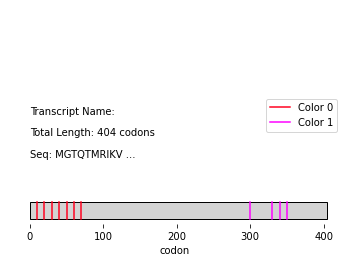

In [13]:
poi.visualize_probe()


2
(2, 501, 20)
Low memory, no recording: solved in 0.039018 seconds


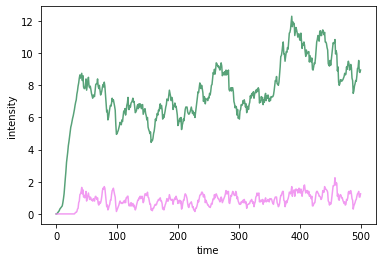

In [18]:
sttime = time.time()
ssa_soln = solver.solve_ssa([.033] + poi.kelong + [10],t,n_traj=20)
solvetime = time.time()-sttime
print(ssa_soln.intensity_vec.shape)
plt.plot(np.mean(ssa_soln.intensity_vec[0],axis=1),color='seagreen',alpha=.8)
plt.plot(np.mean(ssa_soln.intensity_vec[1],axis=1),color='violet',alpha=.8)
plt.xlabel('time')
plt.ylabel('intensity')
print("Low memory, no recording: solved in %f seconds" % solvetime)


## Autocovariances with individual means

(0.0, 100.0)

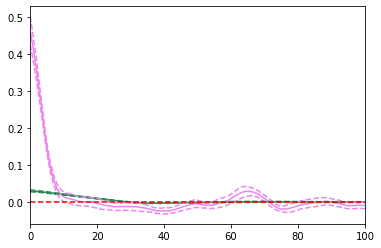

In [4]:
acov,err_acov = ia().get_autocov(ssa_soln.intensity_vec,norm='ind')
plt.plot(np.mean(acov[0],axis=1),color='seagreen');plt.plot(np.mean(acov[1],axis=1),color='violet')
plt.plot(np.mean(acov[0],axis=1) - err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)- err_acov[1],'--',color='violet')
plt.plot(np.mean(acov[0],axis=1)+ err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)+ err_acov[1],'--',color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

(0.0, 100.0)

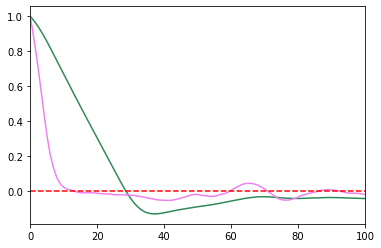

In [5]:
#normalized by G0

acc = ia().get_autocorr(acov)
plt.plot(np.mean(acc[0],axis=1),color='seagreen');plt.plot(np.mean(acc[1],axis=1),color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

## Global means

(0.0, 100.0)

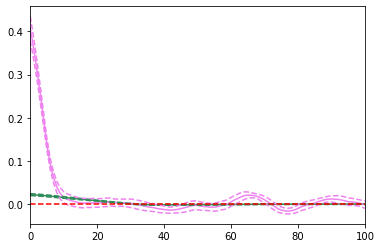

In [6]:
acov,err_acov = ia().get_autocov(ssa_soln.intensity_vec,norm='global')
plt.plot(np.mean(acov[0],axis=1),color='seagreen');plt.plot(np.mean(acov[1],axis=1),color='violet')
plt.plot(np.mean(acov[0],axis=1) - err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)- err_acov[1],'--',color='violet')
plt.plot(np.mean(acov[0],axis=1)+ err_acov[0],'--',color='seagreen');plt.plot(np.mean(acov[1],axis=1)+ err_acov[1],'--',color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

(0.0, 100.0)

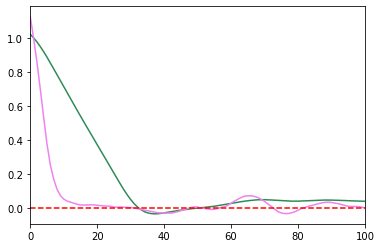

In [11]:
#normalized by G0

acc = ia().get_autocorr(acov,g0='G1')
plt.plot(np.mean(acc[0],axis=1),color='seagreen');plt.plot(np.mean(acc[1],axis=1),color='violet')
plt.plot([0,500],[0,0],'r--')
plt.xlim([0,100])

## Cross correlations

(400.0, 600.0)

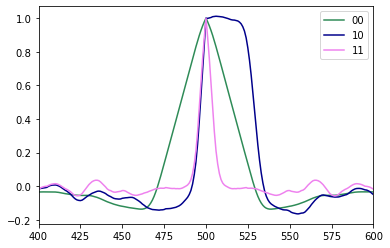

In [8]:
cross_corr,inds = ia().get_crosscorr(ssa_soln.intensity_vec)
plt.figure()

s11_cc = np.mean(cross_corr[0],axis=1)
s12_cc = np.mean(cross_corr[1],axis=1)
s21_cc = np.mean(cross_corr[2],axis=1)
s22_cc = np.mean(cross_corr[3],axis=1)

plt.plot(s11_cc/s11_cc[500],color='seagreen' ); plt.plot(s21_cc/s21_cc[500],color='darkblue');
plt.plot(s22_cc/s22_cc[500],color='violet');

plt.legend(['00','10','11' ])
plt.xlim([400,600])
